# Spotify Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import plotly
import plotly.express as px
import squarify as sq

In [5]:
df=pd.read_csv(r'C:\Users\Ajay Dhariwal\Desktop\Github\spotify\data.csv')

In [6]:
df.head(2)

track_name track_artist  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...   Ed Sheeran   
1                    Memories - Dillon Francis Remix     Maroon 5   

   track_popularity                                   track_album_name  \
0                66  I Don't Care (with Justin Bieber) [Loud Luxury...   
1                67                    Memories (Dillon Francis Remix)   

  track_album_release_date playlist_name             playlist_id  \
0               14-06-2019     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1               13-12-2019     Pop Remix  37i9dQZF1DXcZDD7cfEKhW   

  playlist_genre playlist_subgenre  danceability  ...  key  loudness  mode  \
0            pop         dance pop         0.748  ...    6    -2.634     1   
1            pop         dance pop         0.726  ...   11    -4.969     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0583        0.1020           0.00000    0.0653    0.518  122.036   
1       0.0373        0.0724           0.00421    0.3570    0.693   99.972   

   duration_ms  
0       194754  
1       162600  

[2 rows x 21 columns]

In [ ]:
df.drop(columns=['uri','track_href','analysis_url','Unnamed: 0','type','id',],inplace=True)


In [7]:
df.isna().sum()

track_name                  5
track_artist                5
track_popularity            0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [8]:
df.fillna({'track_name':'Unknown','track_artist':'Unknown','track_album_name':'Unknown'},inplace=True)

In [9]:
df.isna().sum()

track_name                  0
track_artist                0
track_popularity            0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [10]:
df.drop(columns=['playlist_id','mode'],inplace=True)

In [11]:
df.head(2)

track_name track_artist  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...   Ed Sheeran   
1                    Memories - Dillon Francis Remix     Maroon 5   

   track_popularity                                   track_album_name  \
0                66  I Don't Care (with Justin Bieber) [Loud Luxury...   
1                67                    Memories (Dillon Francis Remix)   

  track_album_release_date playlist_name playlist_genre playlist_subgenre  \
0               14-06-2019     Pop Remix            pop         dance pop   
1               13-12-2019     Pop Remix            pop         dance pop   

   danceability  energy  key  loudness  speechiness  acousticness  \
0         0.748   0.916    6    -2.634       0.0583        0.1020   
1         0.726   0.815   11    -4.969       0.0373        0.0724   

   instrumentalness  liveness  valence    tempo  duration_ms  
0           0.00000    0.0653    0.518  122.036       194754  
1           0.00421    0.3570    0.693   99.972       162600

In [12]:
df_numeric=df._get_numeric_data()


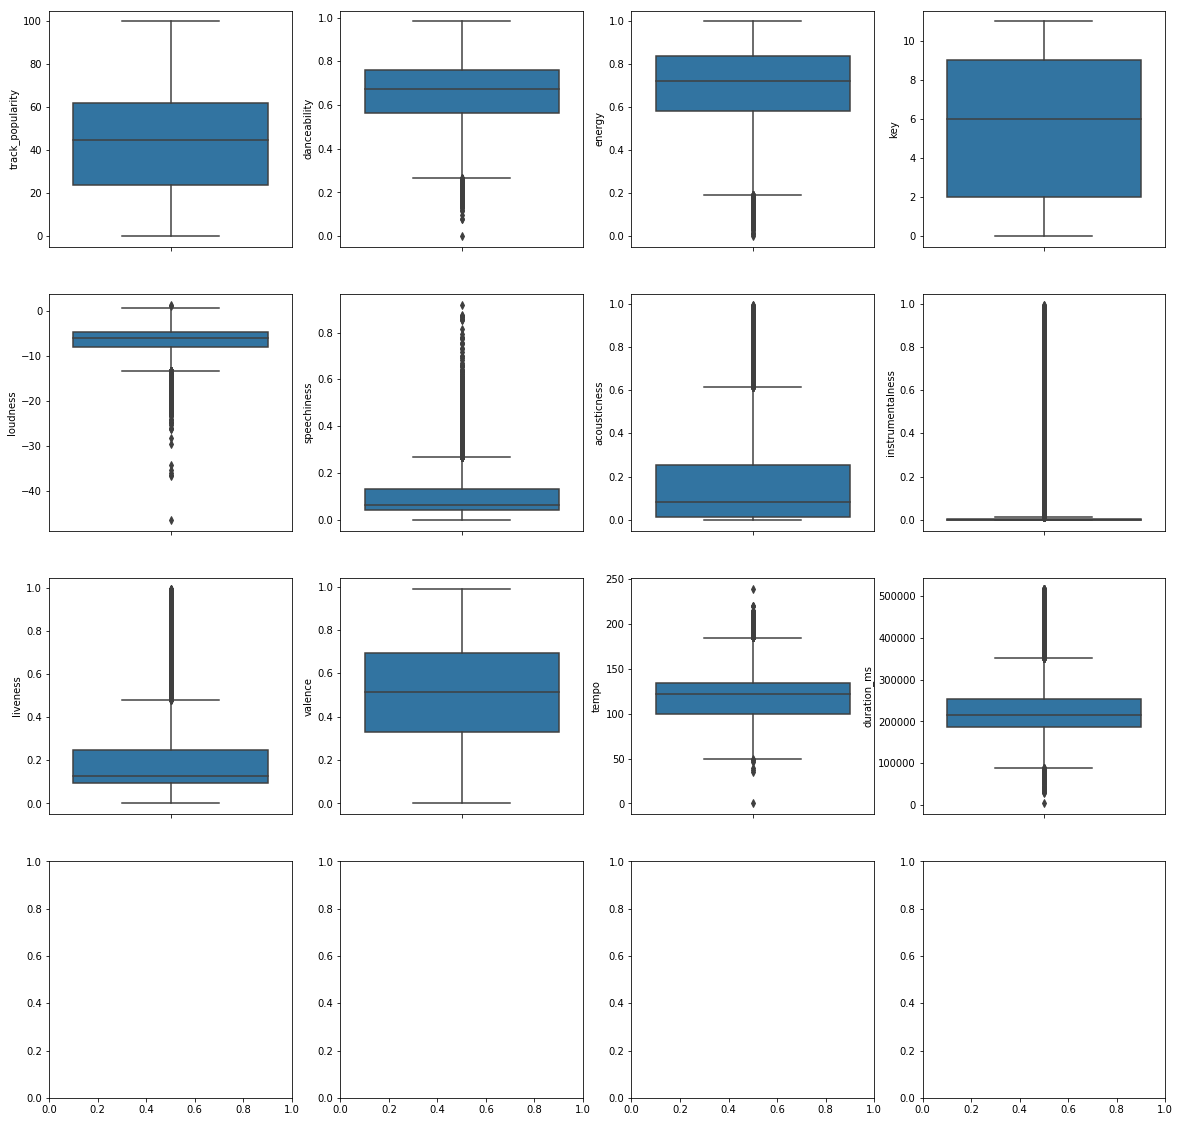

In [13]:
fig1,ax1=plt.subplots(figsize=(20,20),nrows=4,ncols=4)
ax1=ax1.flatten()
start=0
for i,j in df_numeric.items():
    sns.boxplot(y=j,ax=ax1[start])
    start+=1

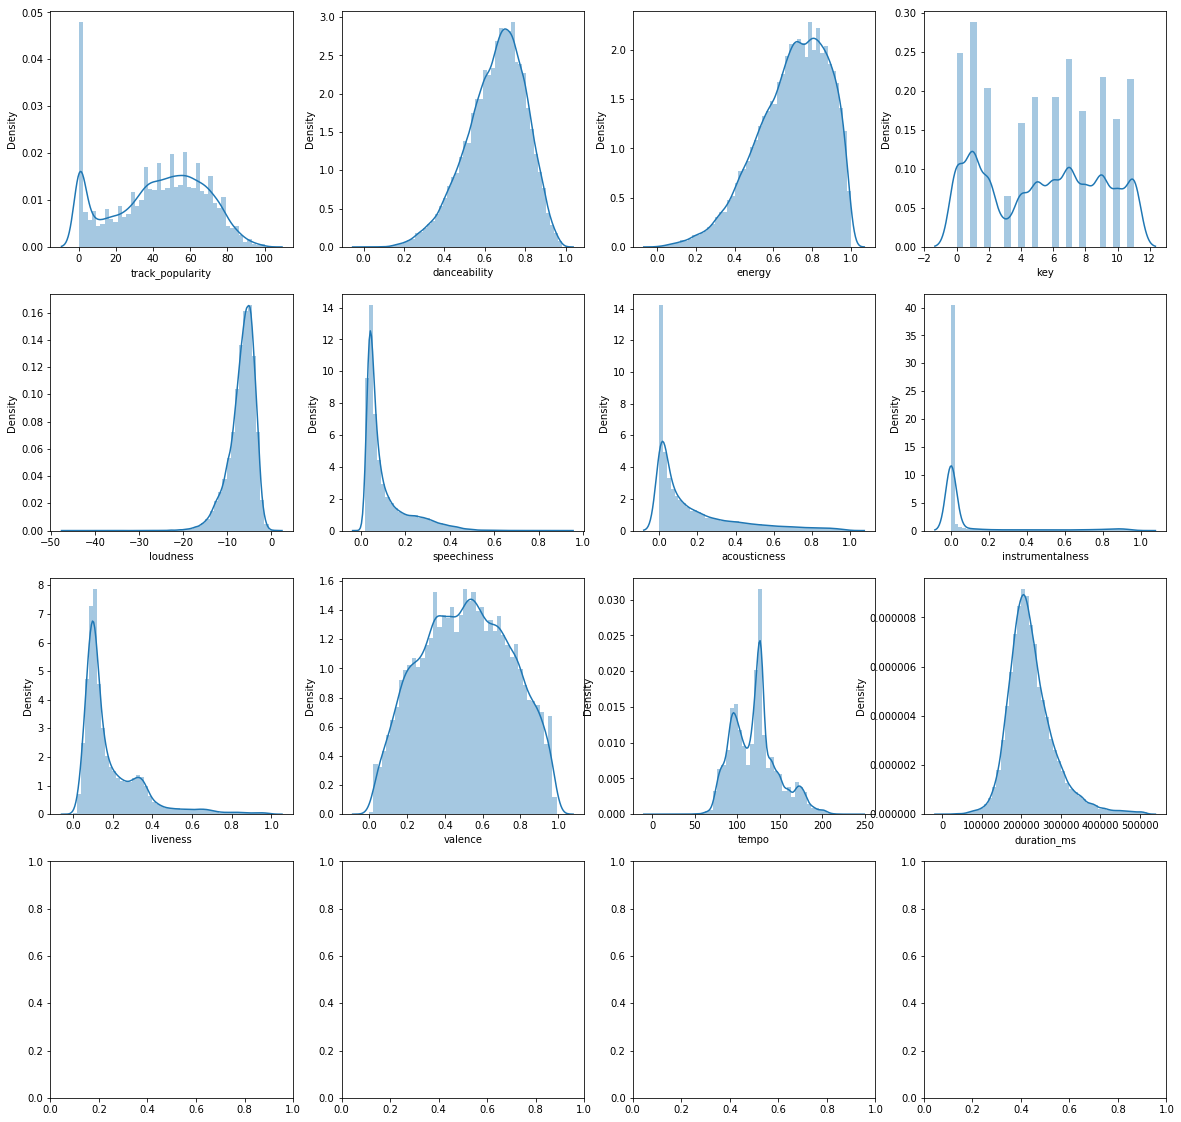

In [14]:
fig1,ax1=plt.subplots(figsize=(20,20),nrows=4,ncols=4)
ax1=ax1.flatten()
start=0
for i,j in df_numeric.items():
    sns.distplot(j,ax=ax1[start])
    start+=1

# 1. Trends over the years

In [15]:
df_=df[['track_album_release_date','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
df_['years']=df_['track_album_release_date'].str.split('-',expand=True)[2]
df_.drop(columns=['track_album_release_date'],inplace=True)
df_=df_.sort_values(by='years')
df_=df_.groupby('years').mean()

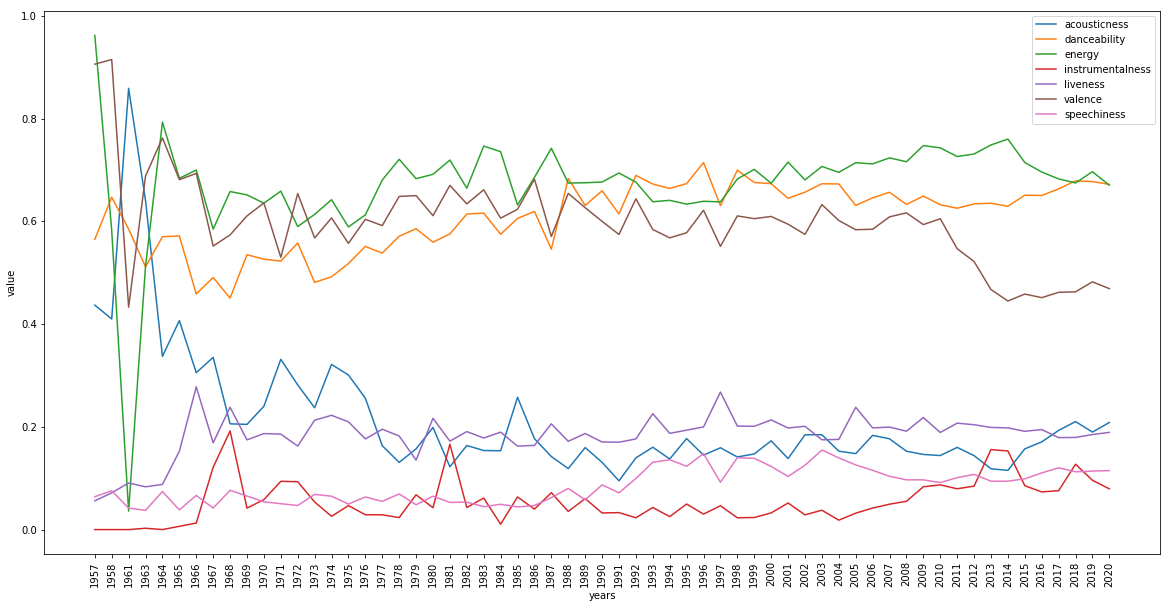

In [16]:
plt.figure(figsize=(20,10))
lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness"]

for line in lines:
    ax = sns.lineplot(x='years', y=line, data=df_,markers=True,ci=0)
    
    
plt.ylabel("value")
plt.legend(lines)
plt.xticks(rotation=90)
plt.show()

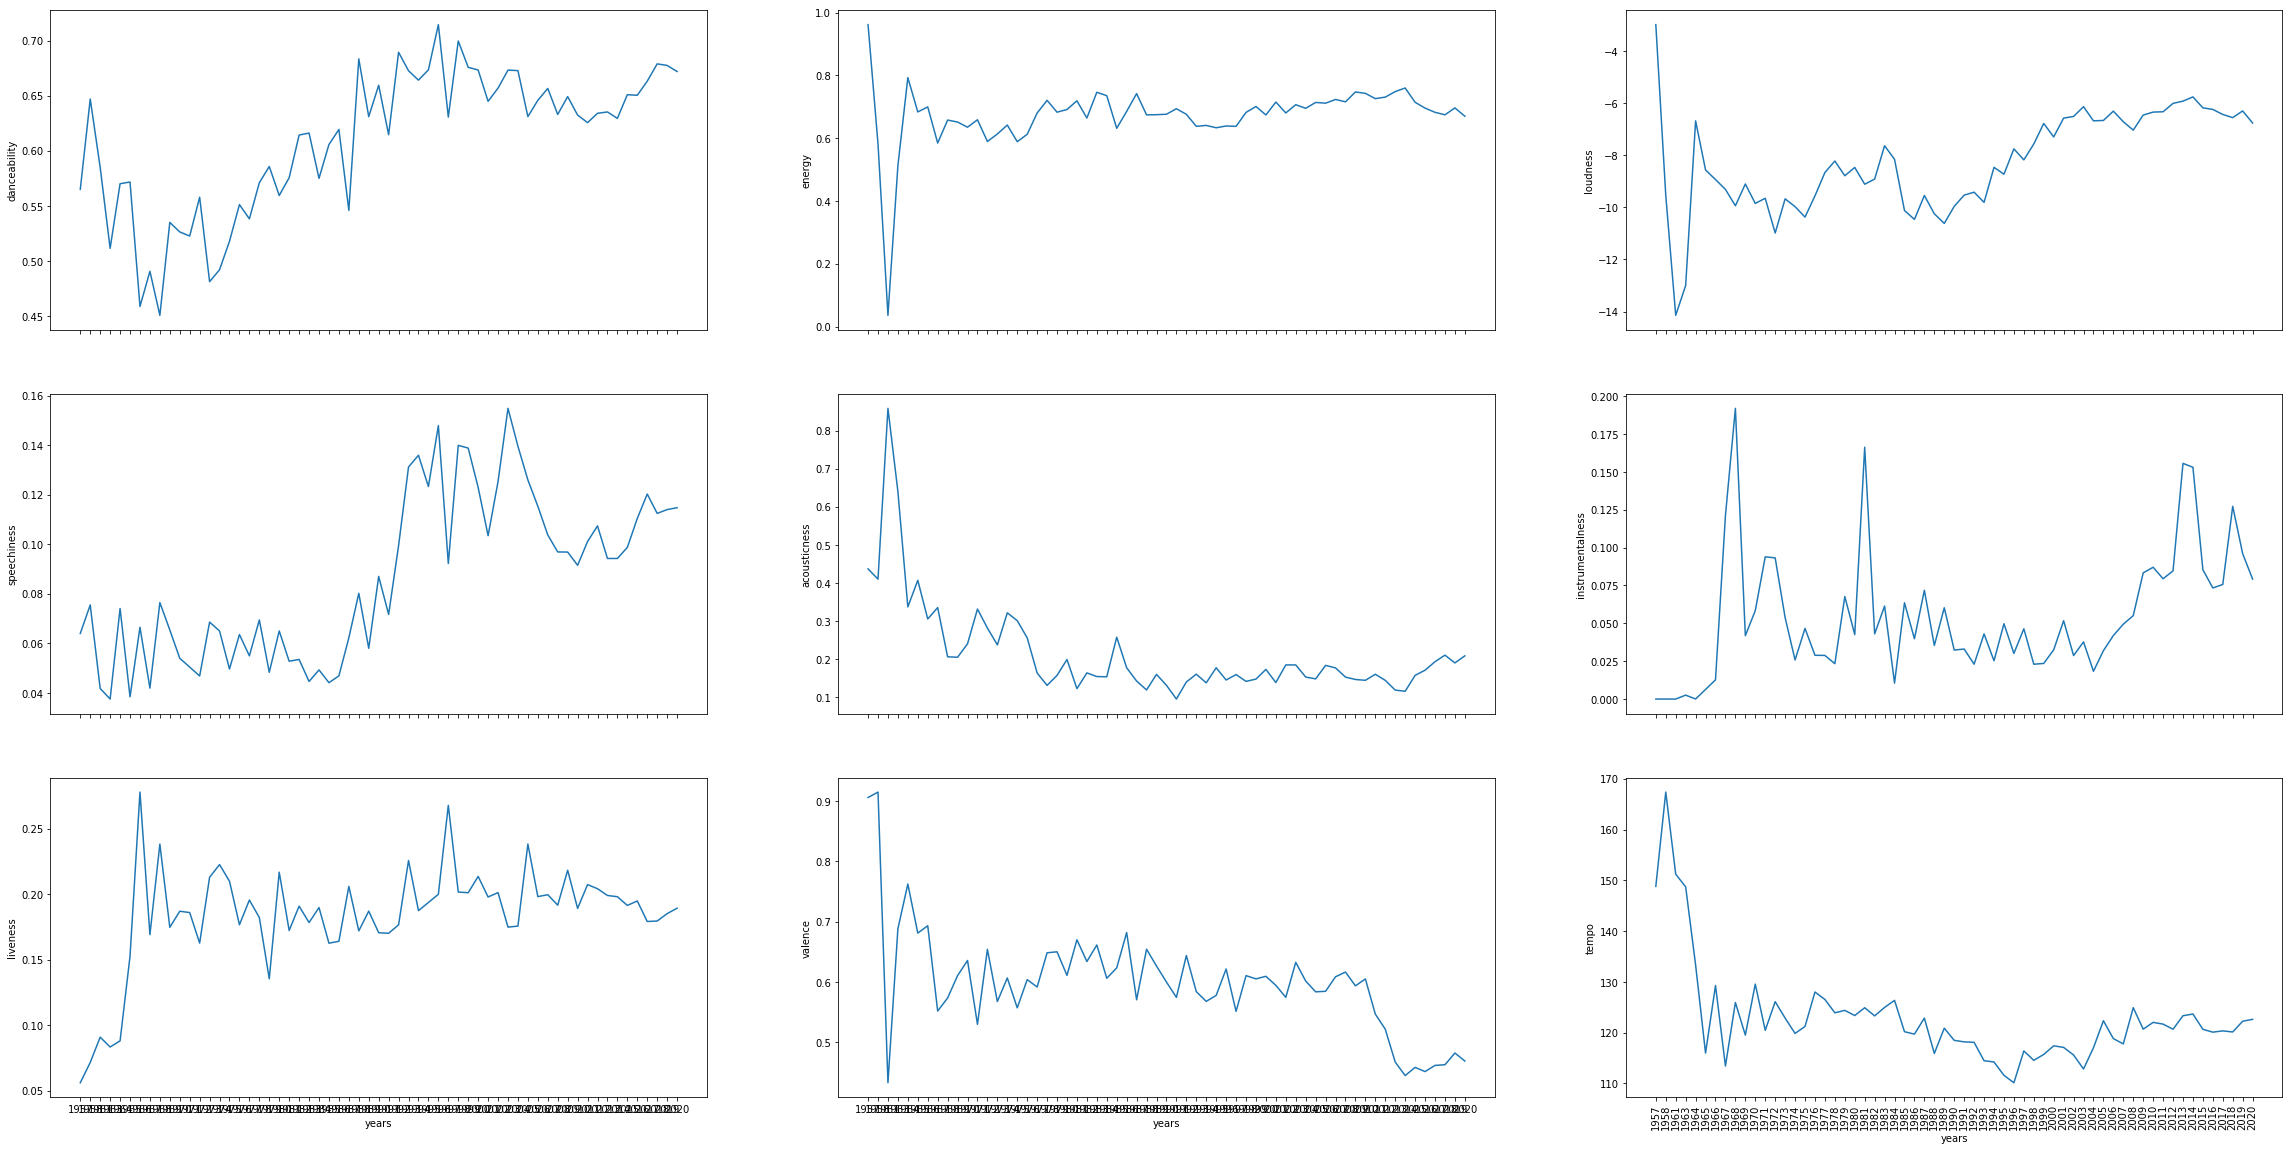

In [17]:
fig1,ax1=plt.subplots(figsize=(40,20),nrows=3,ncols=3,sharex=True)
ax1=ax1.flatten()
start=0
for i,j in df_.items():
    j=j.reset_index()
    sns.lineplot(x=j['years'],y=j[i],ax=ax1[start])
    plt.xticks(rotation=90)
    start+=1

plt.show()

# 2. Artist with the highest average track popularity over the years

In [18]:
df_1=df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False)[:10].reset_index()

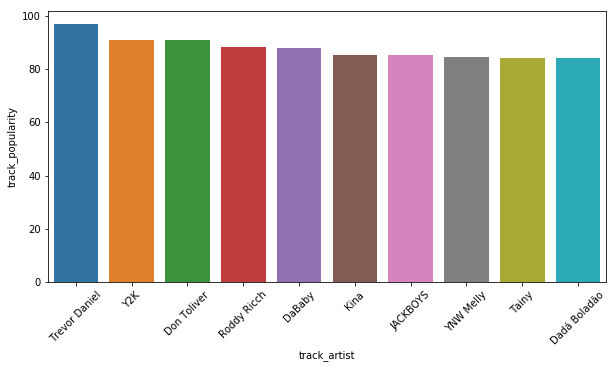

In [19]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(data=df_1,x='track_artist',y='track_popularity')

# 3. Genre Trend over the years

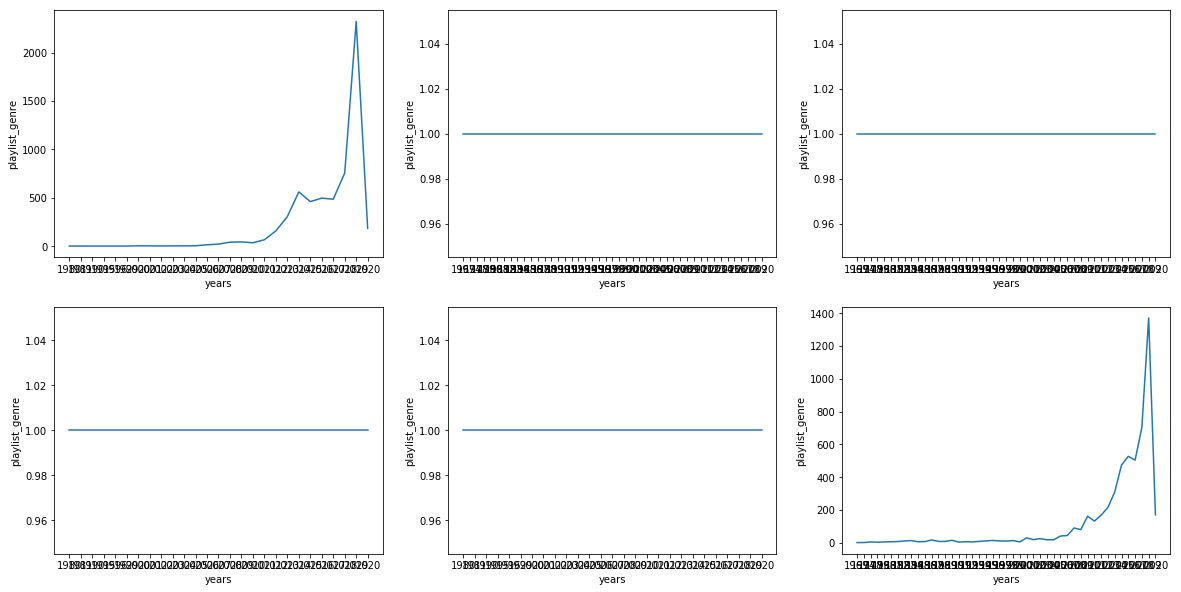

In [20]:
df_g=df[['track_album_release_date','playlist_genre']]
df_g['years']=df['track_album_release_date'].str.split('-',expand=True)[2]
df_g.drop(columns=['track_album_release_date'],inplace=True)
df_g_edm=df_g[df_g['playlist_genre']=='edm']
df_g_edm.sort_values(by='years',inplace=True,ascending=True)
df_g_pop=df_g[df_g['playlist_genre']=='pop']
df_g_pop.sort_values(by='years',inplace=True,ascending=True)
df_g_edm=df_g_edm.groupby('years').count().reset_index()
df_g_pop=df_g_pop.groupby('years').count().reset_index()

df_g_rap=df_g[df_g['playlist_genre']=='rap']
df_g_rap.sort_values(by='years',inplace=True,ascending=True)
df_g_rb=df_g[df_g['playlist_genre']=='rb']
df_g_rb.sort_values(by='years',inplace=True,ascending=True)
df_g_rap=df_g_edm.groupby('years').count().reset_index()
df_g_rb=df_g_pop.groupby('years').count().reset_index()

df_g_latin=df_g[df_g['playlist_genre']=='latin']
df_g_latin.sort_values(by='years',inplace=True,ascending=True)
df_g_rock=df_g[df_g['playlist_genre']=='rock']
df_g_rock.sort_values(by='years',inplace=True,ascending=True)
df_g_latin=df_g_edm.groupby('years').count().reset_index()
df_g_rock=df_g_pop.groupby('years').count().reset_index()

fig1,ax2=plt.subplots(figsize=(20,10),nrows=2,ncols=3)
ax2=ax2.flatten()
sns.lineplot(data=df_g_edm,x='years',y='playlist_genre',ax=ax2[0])
sns.lineplot(data=df_g_rock,x='years',y='playlist_genre',ax=ax2[1])
sns.lineplot(data=df_g_rb,x='years',y='playlist_genre',ax=ax2[2])
sns.lineplot(data=df_g_latin,x='years',y='playlist_genre',ax=ax2[3])
sns.lineplot(data=df_g_rap,x='years',y='playlist_genre',ax=ax2[4])
sns.lineplot(data=df_g_pop,x='years',y='playlist_genre',ax=ax2[5])


# 4. Count of different genres of tracks

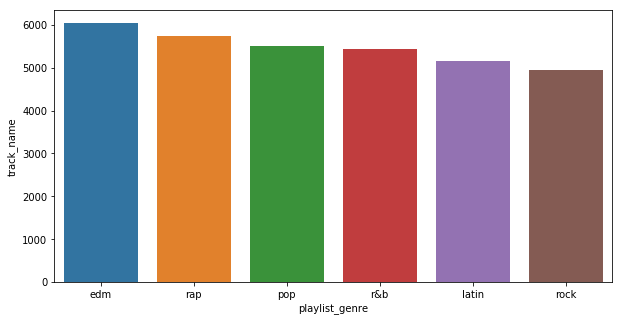

In [21]:
plt.figure(figsize=(10,5))
df_gr=df.groupby('playlist_genre')['track_name'].count().reset_index()
df_gr=df_gr.sort_values(by='track_name',ascending=False)
sns.barplot(data=df_gr,x='playlist_genre',y='track_name')

# 5.  Distribuition of Genres on Spotify

In [22]:
px.pie(df.playlist_genre,
       labels = df.playlist_genre.value_counts().index,
       values = df.playlist_genre.value_counts().values,
       names = df.playlist_genre.value_counts().index,
       title = "Distribution of Genres on Spotify"
      )

# 6. Correlation matrix among numeric variabels

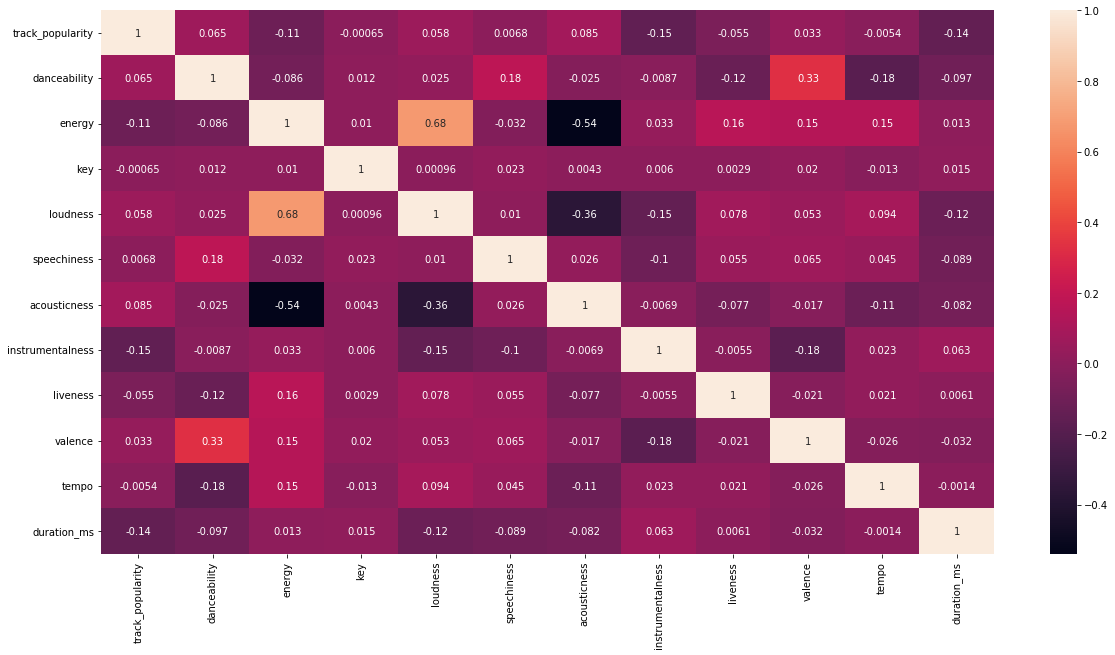

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df_numeric.corr(),annot=True)

# 7. Count by playlist_genre, playlist_subgenre

In [39]:
A=df.groupby(['playlist_genre','playlist_subgenre'])['track_artist'].count().reset_index()
A.style.background_gradient(cmap='Blues')

# 8. Sum of Music Features in every genre

In [373]:
col_list=list(df_numeric.columns)


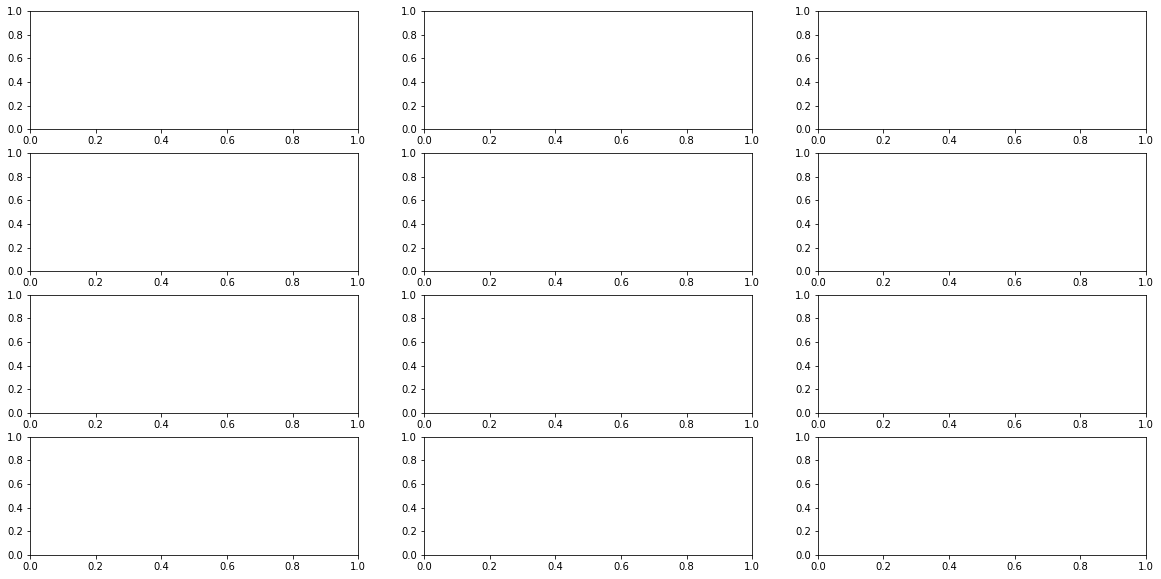

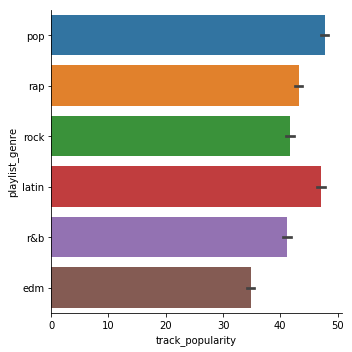

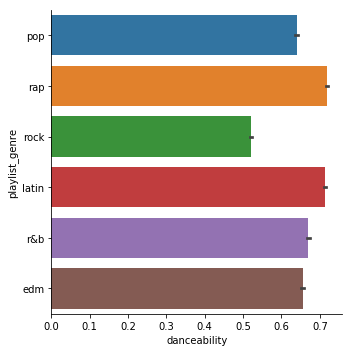

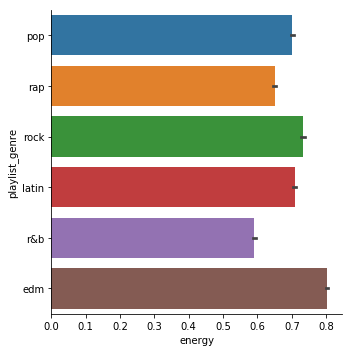

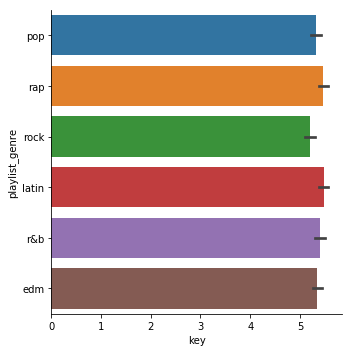

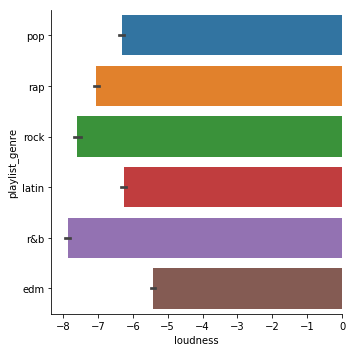

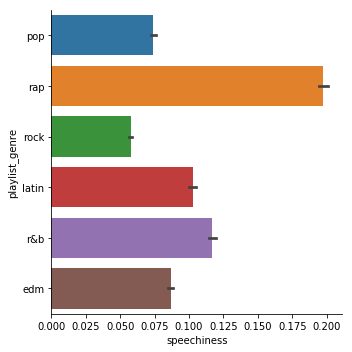

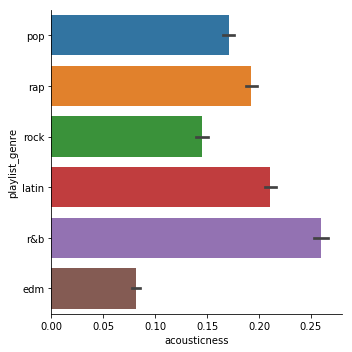

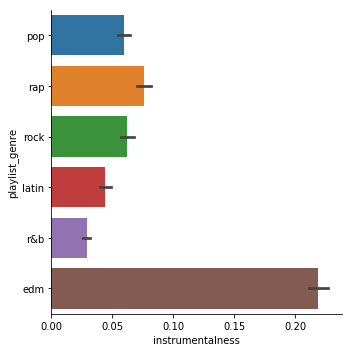

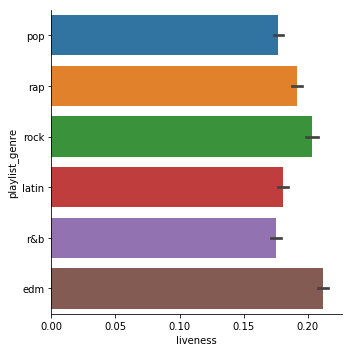

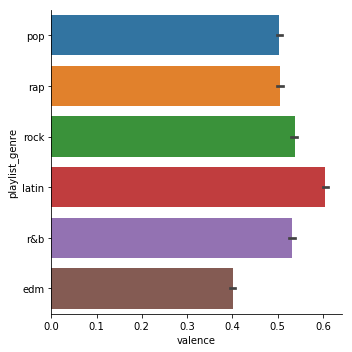

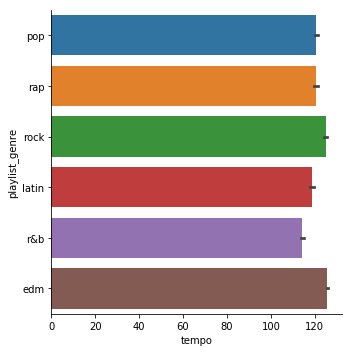

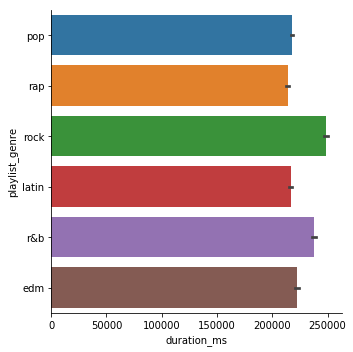

In [376]:
fig5,ax3=plt.subplots(figsize=(20,10),nrows=4,ncols=3)
ax3=ax3.flatten()
start=0
for i,j in df.items():
    if i in col_list:
        sns.catplot(data=df,x=i,y='playlist_genre',ax=ax3[start],kind='bar')
        start+=1

# 9. Pairplot to see pairwise correlations

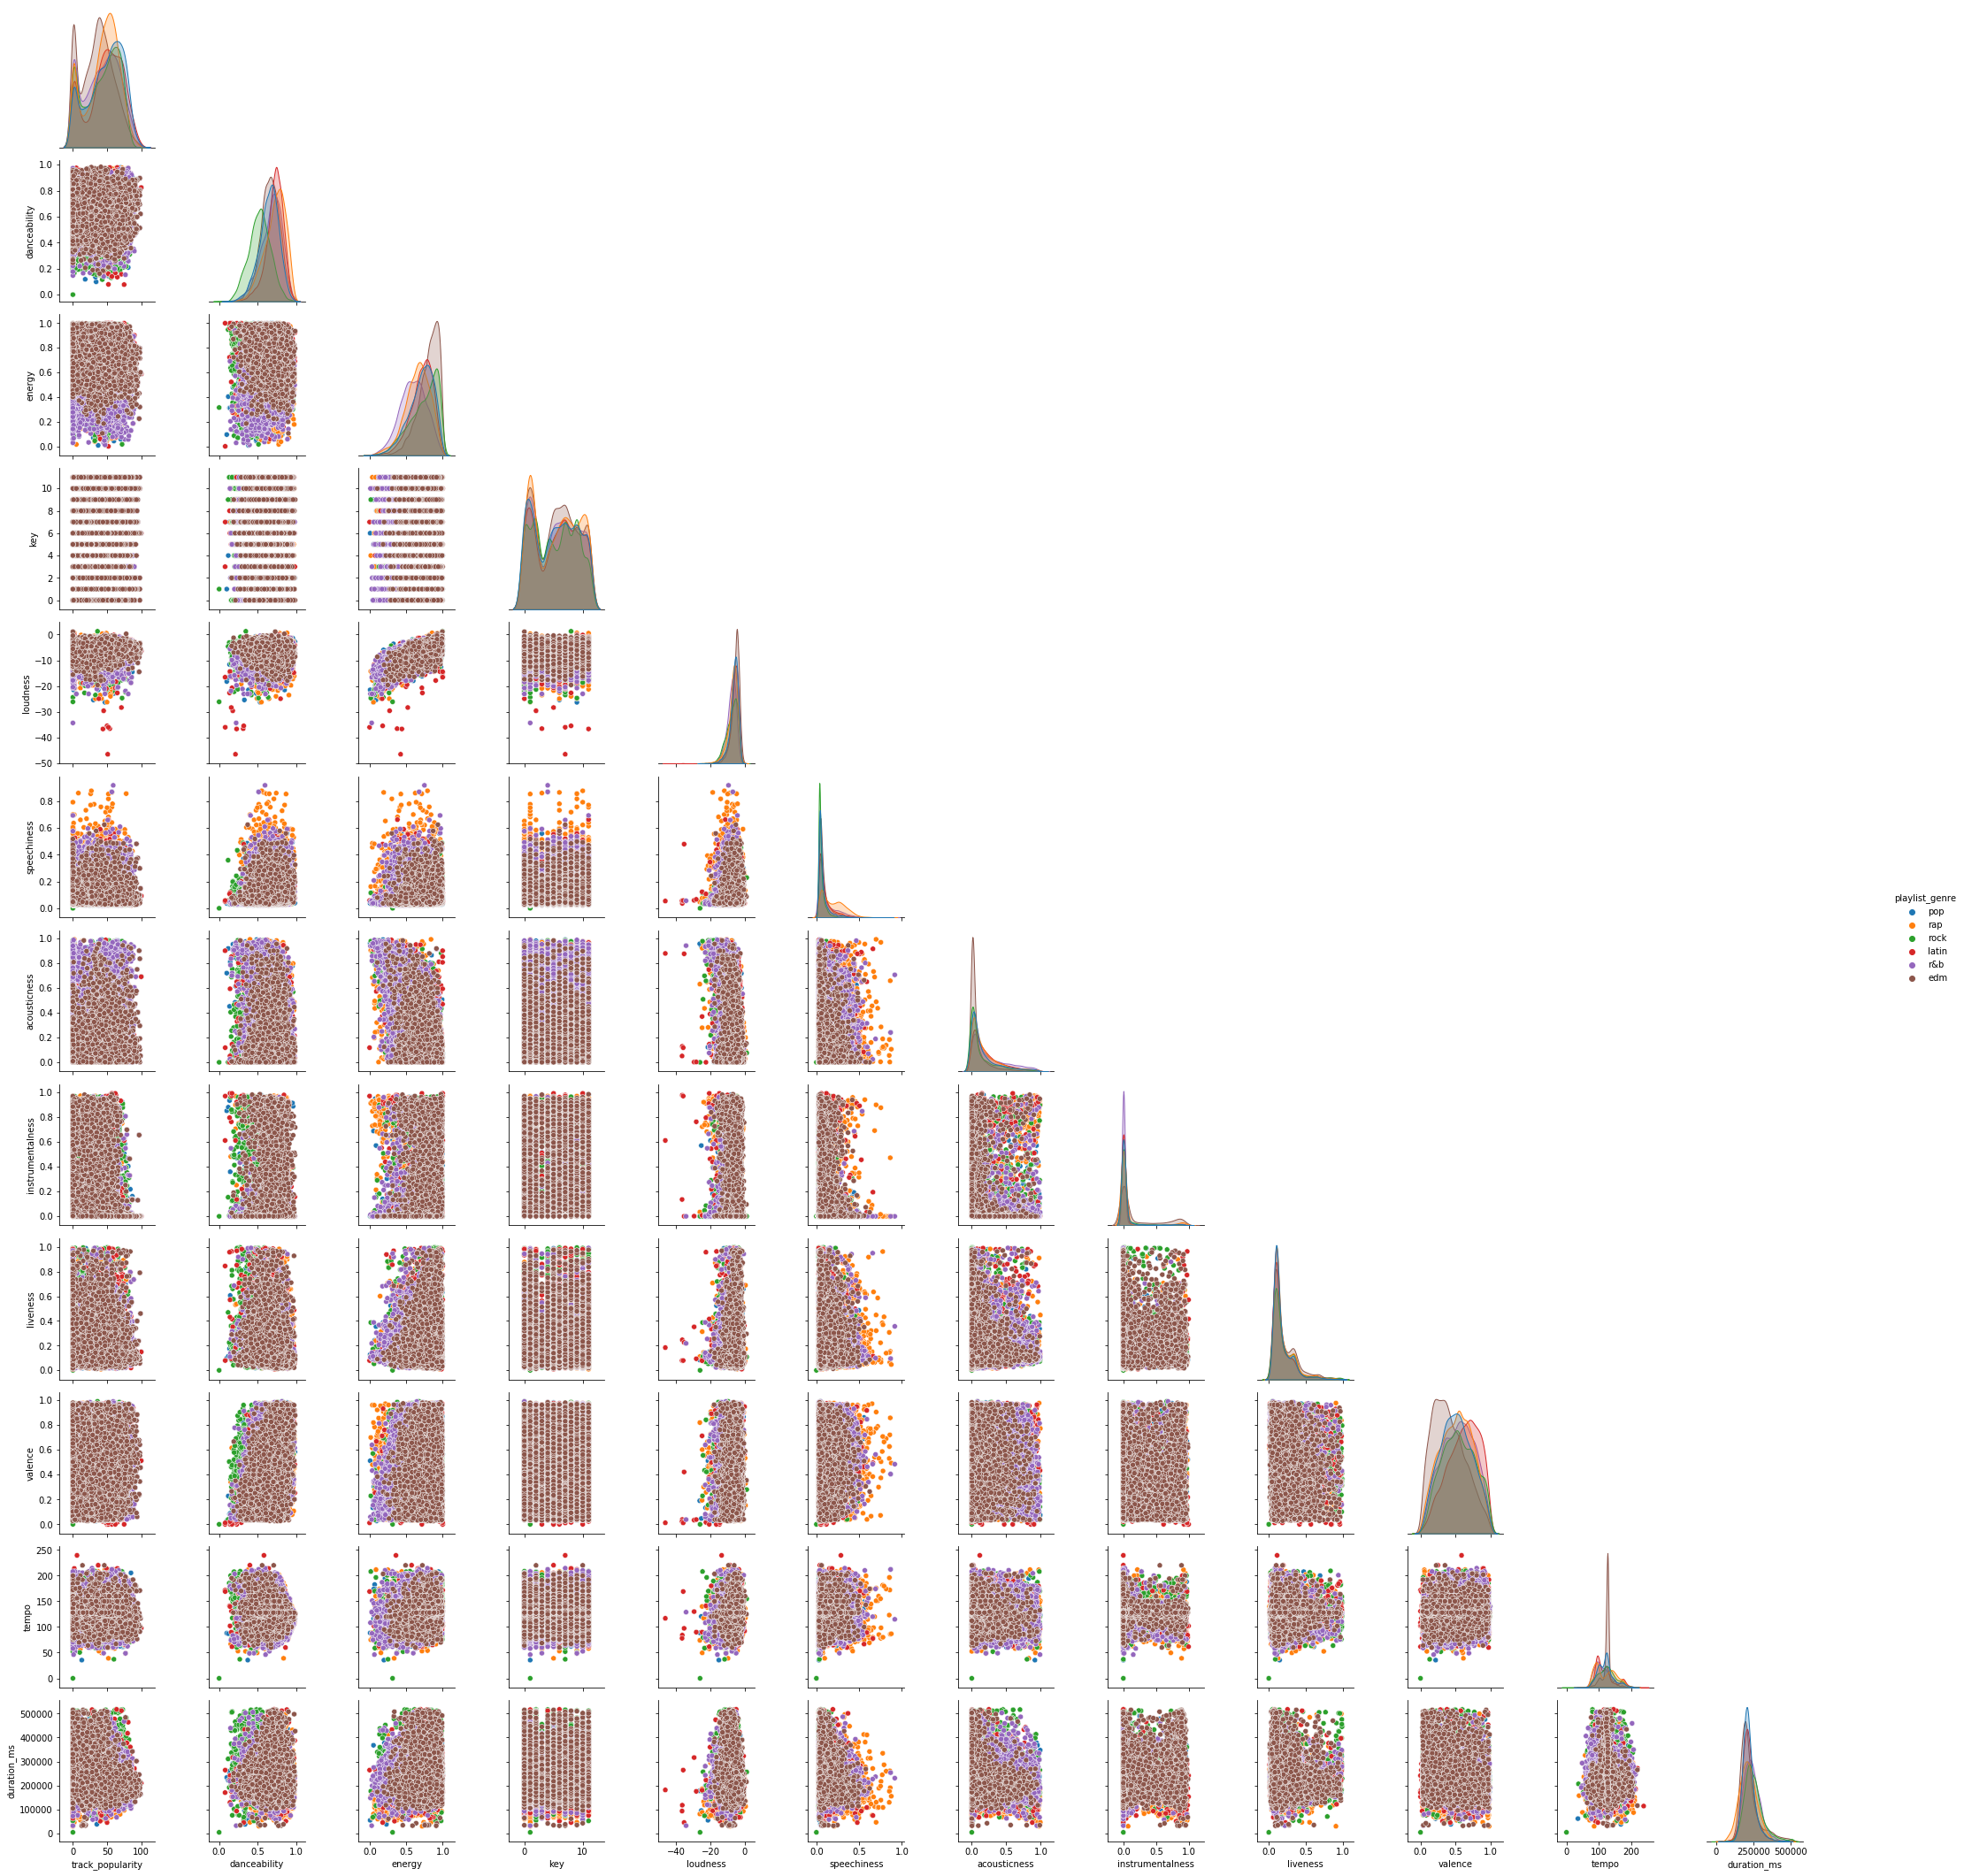

In [105]:
sns.pairplot(df, corner=True, hue='playlist_genre')

# Predicting track_popularity 

In [377]:
df_numeric.head()

track_popularity  danceability  energy  key  loudness  speechiness  \
0                66         0.748   0.916    6    -2.634       0.0583   
1                67         0.726   0.815   11    -4.969       0.0373   
2                70         0.675   0.931    1    -3.432       0.0742   
3                60         0.718   0.930    7    -3.778       0.1020   
4                69         0.650   0.833    1    -4.672       0.0359   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  
0        0.1020          0.000000    0.0653    0.518  122.036       194754  
1        0.0724          0.004210    0.3570    0.693   99.972       162600  
2        0.0794          0.000023    0.1100    0.613  124.008       176616  
3        0.0287          0.000009    0.2040    0.277  121.956       169093  
4        0.0803          0.000000    0.0833    0.725  123.976       189052

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [133]:
y=df_numeric.iloc[:,0]
x=df_numeric.iloc[:,1:]
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [134]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [136]:
lreg.score(x_test,y_test)

0.07326740434516799

In [137]:
from sklearn.metrics import mean_squared_error

# RMSE 23.99

In [146]:
mse=mean_squared_error(y_test,lreg.predict(x_test))
rmse=np.sqrt(mse)
rmse

23.999270566108677

## Let's do Feature Scaling and then see the impact on the model

In [299]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [305]:
x_=df_numeric.iloc[:,1:]
y_=df_numeric.iloc[:,1]

In [306]:
x_train,x_test,y_train,y_test=train_test_split(x_,y_)

In [317]:
x_transformer=ms.fit(x_train)
x_train_scaled=x_transformer.transform(x_train)
x_test_scaled=x_transformer.transform(x_test)

In [327]:
lreg=LinearRegression()
lreg.fit(x_train_scaled,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# RMSE 2.7377

In [328]:
mse=mean_squared_error(y_test,lreg.predict(x_test_scaled))
rmse=np.sqrt(mse)
rmse

2.7377853783549924e-16

# Principal Component Analysis

## Step 1: Import the module and declare the percentage of variance to be retained
The code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [339]:
from sklearn.decomposition import PCA
pca=PCA(0.95)


## Step 2. Standardize the Data

In [358]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
x_=df_numeric.iloc[:,1:]
# get the predictor varibales
y_=df_numeric.iloc[:,1]
# get the labels
x_train,x_test,y_train,y_test=train_test_split(x_,y_)
#split them to get the training and testing data
s=standardscaler.fit(x_train)
#fit the standardscaler on the training data
x_train_scaled=s.transform(x_train)
#transform the training data
x_test_scaled=s.transform(x_test)
#transform the testing data 

# Step 3. Fit the pca on the training data

In [343]:
pc=pca.fit(x_train_scaled)

In [359]:
pca.n_components_
# WE can find out how many components PCA choose after fitting the model using pca.n_components_ 
#. In this case, 95% of the variance amounts to 10 principal components.

10

In [348]:
train_x=pc.transform(x_train_scaled)
test_x=pc.transform(x_test_scaled)

# Step 4. Apply the model and check the rmse

In [368]:
reg=LinearRegression()
reg.fit(train_x,y_train)
reg.score(test_x,y_test)

-0.0004501471815827607

# RMSE 0.144

In [371]:
mse1=mean_squared_error(y_test,reg.predict(test_x))
rmse1=np.sqrt(mse1)
rmse1

0.14465041492834904